**Primeiramente, vamos abrir o arquivo e utilizar o print para visualizrar os dados, sabendo previamente que as colunas representam Tempo (dias), Magnitude e Incerteza associada.**


In [15]:
import numpy as np
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt

In [16]:

# Carregar o arquivo CSV
nome_arquivo = 'P1-mag.txt'  # Substitua pelo caminho do seu arquivo .txt

dados = pd.read_csv(nome_arquivo, delimiter=',', skiprows=4, header=None)

# Renomear as colunas
dados.columns = ['tempo', 'magnitude', 'incerteza']

# Exibir os dados
print(dados)


           tempo  magnitude  incerteza
0     306.819117     19.986      0.208
1     307.931260     20.253      0.140
2     309.000828     19.985      0.133
3     310.205856     19.973      0.116
4     311.024369     20.426      0.154
..           ...        ...        ...
335  3291.193607     17.774      0.186
336  3291.967890     17.832      0.095
337  3293.072479     17.668      0.125
338  3294.153447     17.600      0.178
339  3295.166649     17.723      0.155

[340 rows x 3 columns]


**Agora, vamos plotar para melhor visualização:**


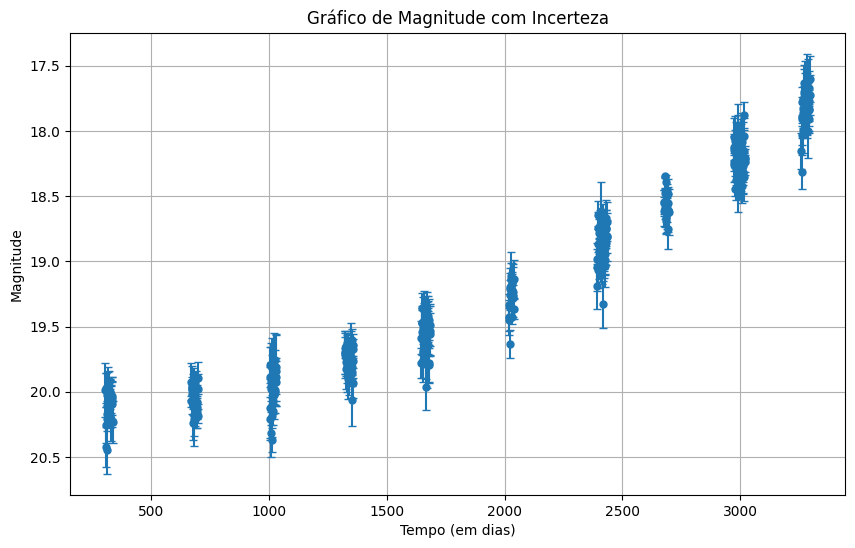

In [17]:
# Plotar os dados
plt.figure(figsize=(10, 6))
plt.errorbar(dados['tempo'], dados['magnitude'], yerr=dados['incerteza'], fmt='o', markersize=5, capsize=3)
plt.xlabel('Tempo (em dias)')
plt.ylabel('Magnitude')
#plt.xlim(3000,3400)
plt.title('Gráfico de Magnitude com Incerteza')
plt.gca().invert_yaxis()  # Inverter o eixo y (magnitude)
plt.grid(True)
plt.show()

**Certo, temos uma curva decrescente em magnitude ao longo dos dias e com "observações" concentradas ao em periodos de mais ou menos 50 dias. Entre cada "periodo" de observações temos um intervalo de tempo sem dados, intervalo esse que certamente é maior que 100 dias. Com isso em mente, vamos ao boxplot:**

- Para plolar um boxplot é preciso informar tres pametros: 1) a posição no eixo x da "caixa" (ou seja, o dia), 2) os valores que serão usados para preencher a "caixa" (no caso os valores de magnitude) e 3) o tamanho da caixa.

- Dito isso, o primeiro passo foi definir o que chamamos de intervalo. Para isso, me certifiquei de que toda vez que a diferença entre o dia atual e o dia anterior for maior que 100, temos um novo intervalo.

- Dessa forma, podemos agora definir os parametros. Para o primeiro parametro, resolvi utilizar o valor médio de dias do intervalo. Para o segundo, simplesmente salvei os valores de magnitude dentro do intervalo. e o Terceiro escolhi visualmente o que achei melhor.

O código responsavel por fazer o que foi descrito aqui consta na celula abaixo:

In [18]:
df = pd.DataFrame(dados)

# Inicializar as listas para armazenar os intervalos de tempo e os valores de magnitude em cada intervalo
intervalos_tempo = []
valores_magnitude = []

# Inicializar variáveis para acompanhar o intervalo atual
intervalo_atual = []
ultimo_tempo = None

# Percorrer o DataFrame
for index, linha in df.iterrows():
    tempo = linha['tempo']
    magnitude = linha['magnitude']
    
    # Verificar se é o primeiro intervalo ou se a diferença de tempo é maior que 100
    if ultimo_tempo is None or (tempo - ultimo_tempo) > 100:
        # Adicionar o intervalo anterior à lista de intervalos e iniciar um novo intervalo
        if intervalo_atual:
            intervalos_tempo.append(intervalo_atual)
            valores_magnitude.append(magnitude_intervalo)
        intervalo_atual = [tempo]
        magnitude_intervalo = [magnitude]
    else:
        # Continuar o intervalo atual
        intervalo_atual.append(tempo)
        magnitude_intervalo.append(magnitude)
    
    # Atualizar o último tempo
    ultimo_tempo = tempo

# Adicionar o último intervalo à lista de intervalos
if intervalo_atual:
    intervalos_tempo.append(intervalo_atual)
    valores_magnitude.append(magnitude_intervalo)

# Exibir os intervalos de tempo e os valores de magnitude em cada intervalo
for i, intervalo in enumerate(intervalos_tempo):
    print(f"Intervalo {i+1}: Tempo médio (x): {np.mean(intervalo)}, Magnitude (r): {valores_magnitude[i]}")



Intervalo 1: Tempo médio (x): 322.2043192903225, Magnitude (r): [19.986, 20.253, 19.985, 19.973, 20.426, 20.443, 20.17, 20.206, 20.027, 19.978, 19.918, 20.116, 20.111, 20.107, 20.144, 20.045, 19.925, 20.004, 20.004, 20.038, 20.053, 20.19, 20.027, 20.054, 20.207, 20.051, 20.049, 20.032, 20.073, 20.095, 20.232]
Intervalo 2: Tempo médio (x): 685.1125647, Magnitude (r): [19.921, 20.072, 20.02, 19.97, 19.953, 19.985, 19.98, 20.098, 20.112, 20.237, 20.081, 20.053, 20.179, 20.209, 19.961, 19.938, 20.031, 20.164, 19.975, 20.122, 19.904, 20.155, 20.199, 20.136, 20.077, 20.162, 20.115, 20.185, 19.979, 19.897]
Intervalo 3: Tempo médio (x): 1017.4040705000001, Magnitude (r): [20.205, 20.126, 19.887, 19.793, 19.795, 19.955, 20.312, 19.92, 19.981, 19.906, 19.818, 20.187, 20.37, 19.97, 20.068, 20.146, 19.827, 19.881, 20.027, 20.018, 19.841, 19.821, 19.754, 20.002, 19.989, 19.923, 19.837, 19.89, 19.813, 19.923]
Intervalo 4: Tempo médio (x): 1340.2964495263159, Magnitude (r): [19.705, 19.697, 19.715, 1

**Agora que temos o valor de magnitude do intervalo e também um valor para chamar de posição, vamos plotar o boxplot:**

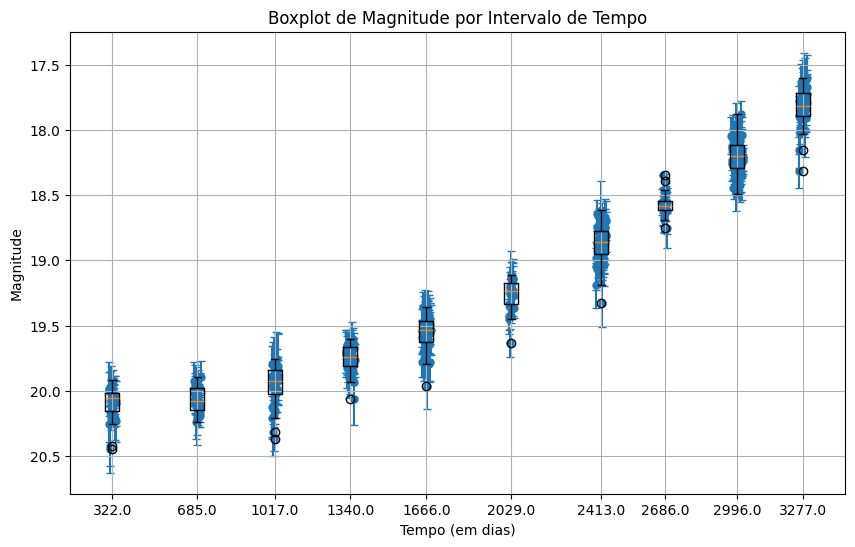

In [19]:
# Calcular a média de cada intervalo de tempo para representar a posição no eixo x
posicoes_x = np.round([np.mean(intervalo) for intervalo in intervalos_tempo])

# Plotar o boxplot com as posições no eixo x e os valores de magnitude correspondentes
plt.figure(figsize=(10, 6))

plt.errorbar(dados['tempo'], dados['magnitude'], yerr=dados['incerteza'], fmt='o', markersize=5, capsize=3, zorder=1)
boxplot = plt.boxplot(valores_magnitude, positions=posicoes_x, widths=60, zorder=2) # Calcula e plota o boxplot que será usado como filtro para remoçao de outliers
plt.xlabel('Tempo (em dias)')
plt.ylabel('Magnitude')
plt.title('Boxplot de Magnitude por Intervalo de Tempo')
plt.gca().invert_yaxis()  # Inverter o eixo y (magnitude)
plt.grid(True)
plt.show()


**Percebe-se que existem valores muito fora do dominio dos quartils do boxplot, destacados com um circulo em preto. Esses valores devem ser retirados do dataframe para evitar o efeito de "Outliers". Para tal, vamos definir um filtro utilizando o proprio boxplot. O código abaixo NECESSÁRIAMENTE precisa ser rodado após a célula acima, pois utiliza dos outliers achados pelo boxplot para fazer a remoção do mesmo.**

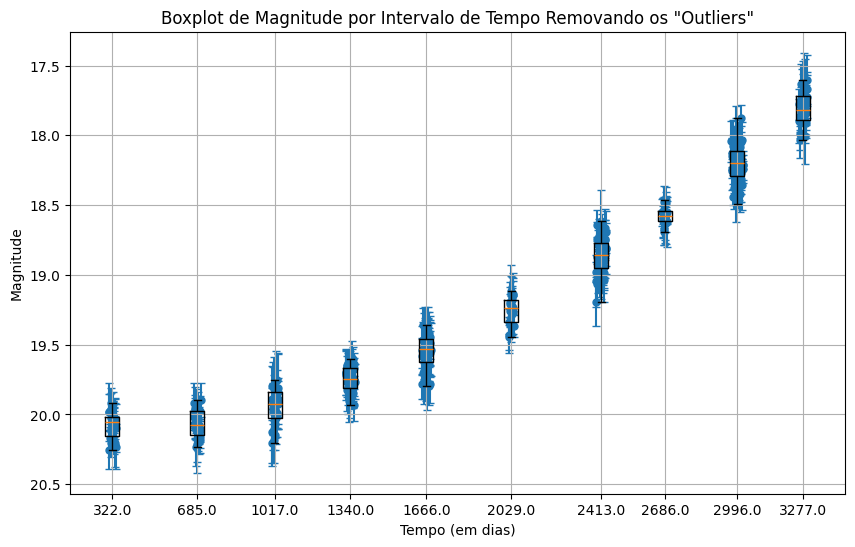

In [20]:
# Calcular a média de cada intervalo de tempo para representar a posição no eixo x
posicoes_x = np.round([np.mean(intervalo) for intervalo in intervalos_tempo])

# Plotar o boxplot com as posições no eixo x e os valores de magnitude correspondentes
plt.figure(figsize=(10, 6))

# Identificar os outliers
outliers = [item.get_ydata() for item in boxplot['fliers']]

# Criar um DataFrame apenas com os valores que não são outliers
dados_sem_outliers = dados[~dados['magnitude'].isin(np.concatenate(outliers))]

boxplot = plt.boxplot(valores_magnitude, positions=posicoes_x, widths=60, zorder=2,showfliers=False)

# Plotar os dados originais com barras de erro
plt.errorbar(dados_sem_outliers['tempo'], dados_sem_outliers['magnitude'], yerr=dados_sem_outliers['incerteza'], fmt='o', markersize=5, capsize=3, zorder=1)

# Configurar o restante do gráfico
plt.xlabel('Tempo (em dias)')
plt.ylabel('Magnitude')
plt.title('Boxplot de Magnitude por Intervalo de Tempo Removando os "Outliers"')
plt.gca().invert_yaxis()  # Inverter o eixo y (magnitude)
plt.grid(True)
plt.show()

# Agora você pode usar o DataFrame 'dados_sem_outliers' para análises adicionais


**Agora recapitulando, temos um dataframe chamado "dados_sem_outliers" onde consta a nossa amostra filtrada, como ilustrado no plot acima. Dessa forma, podemos agora pensar em ajustar uma equação que descreve nossos dados. Para isso, utilizei a função "np.polyfit()", que veio da rotina do numpy (ou classe, nunca sei ao certo) Poly1d[1]. A função polyfit(x,y,deg) é usada para ajustar uma curva polinomial; x e y são os arrays contendo os dados; deg é o grau do polinômio que deseja-se ajustar aos dados. Além disso, também utilizei a função "np.polyval(coeficientes, x)" para avaliar o valor do polinômio nos pontos especificados, "coeficientes" são os coeficientes do polinômio ajustado (que veio da função anterior) e x é o array contendo os pontos onde deseja-se avaliar o polinômio.**


**[1]** https://numpy.org/doc/stable/reference/routines.polynomials.poly1d.html

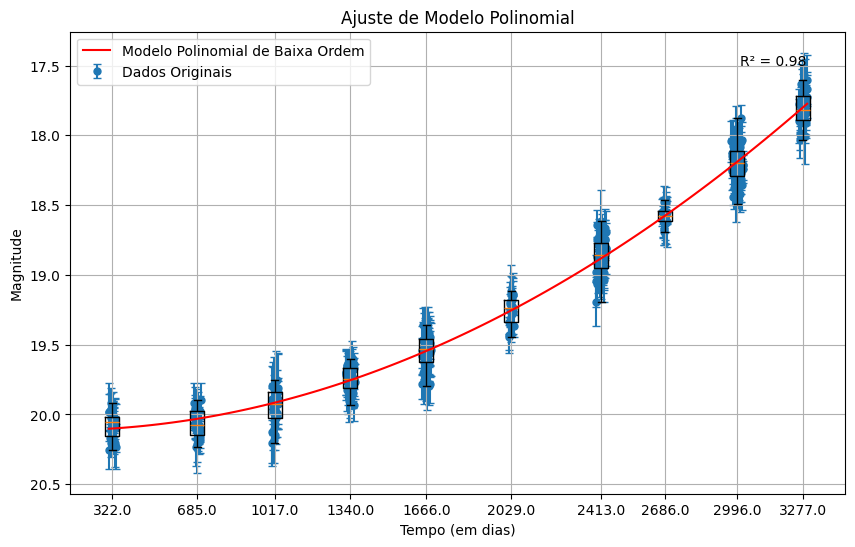

In [21]:
# Ajustar um modelo polinomial de baixa ordem (aqui de grau 2)
coeficientes = np.polyfit(dados_sem_outliers['tempo'], dados_sem_outliers['magnitude'], deg=2)

# Gerar pontos para o modelo ajustado
tempo_modelo = np.linspace(min(dados_sem_outliers['tempo']), max(dados_sem_outliers['tempo']), 100)
magnitude_modelo = np.polyval(coeficientes, tempo_modelo)

# Calcular R²
magnitude_predita = np.polyval(coeficientes, dados_sem_outliers['tempo'])
ss_res = np.sum((dados_sem_outliers['magnitude'] - magnitude_predita) ** 2)
ss_tot = np.sum((dados_sem_outliers['magnitude'] - np.mean(dados_sem_outliers['magnitude'])) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Plotar os dados originais com o modelo ajustado
plt.figure(figsize=(10, 6))
plt.errorbar(dados_sem_outliers['tempo'], dados_sem_outliers['magnitude'], yerr=dados_sem_outliers['incerteza'], fmt='o', markersize=5, capsize=3, label='Dados Originais', zorder=1)
plt.plot(tempo_modelo, magnitude_modelo, color='red', label='Modelo Polinomial de Baixa Ordem',zorder=3)
plt.boxplot(valores_magnitude, positions=posicoes_x, widths=60, zorder=2,showfliers=False)


# Adicionar informações sobre o modelo ajustado
plt.text(0.95, 0.95, f'R² = {r_squared:.2f}', ha='right', va='top', transform=plt.gca().transAxes)
plt.xlabel('Tempo (em dias)')
plt.ylabel('Magnitude')
plt.title('Ajuste de Modelo Polinomial')
plt.gca().invert_yaxis()  # Inverter o eixo y (magnitude)
plt.legend()
plt.grid(True)
plt.show()

**Através do plot vemos que o ajuste é muito bom, e através do Rˆ2 confirmamos que o ajuste está otimo, visto que Rˆ2 = 0.98 sugere que cerca de 98% da variabilidade na magnitude é explicada pelo modelo polinomial que foi ajustado.**

**Agora, passamos ao ultimo passo solicitado no trabalho: plotar um intervalo de predição para 99% dos dados.**
- Calcular os Resíduos: diferenças entre os valores observados e os valores previstos pelo modelo.
- Calcula-se o desvio Padrão dos Resíduos: nos dá uma medida da dispersão dos pontos em relação ao ajuste.
- Cálculo do Intervalo de Predição: Usa-se o desvio padrão para calcular o intervalo de predição. 
    - Intervalo de Predição = t * Desvio Padrão dos Resíduos * sqrt(1 + (1/n) + ((x - x̄)^2) / Σ(xi - x̄)^2)
- Determina-se o tamanho do intervalo de predição: depende do tamanho da amostra e é influenciado pelo valor crítico de uma distribuição estatística (a distribuição t de Student).
- Plot da curva de predição: preenche-se a área entre a linha de ajuste e as duas curvas que delimitam o intervalo de predição.

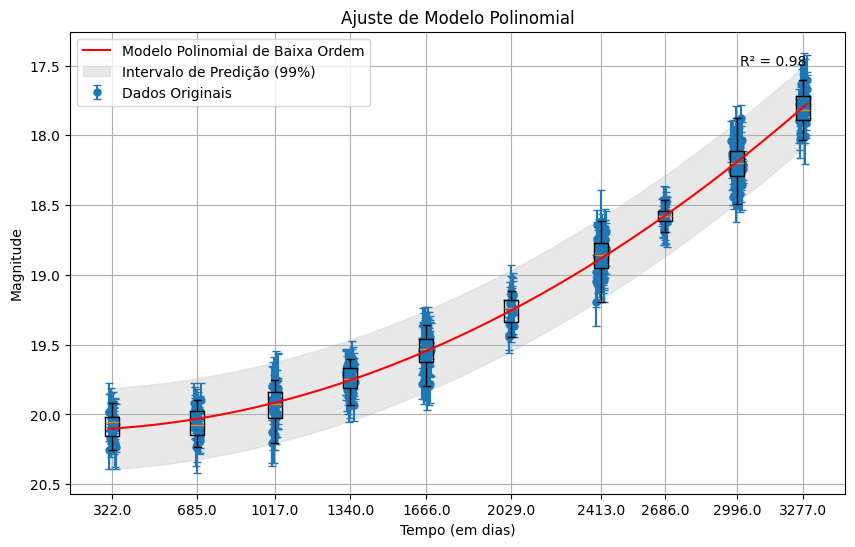

In [25]:
# Ajustar um modelo polinomial de baixa ordem (grau 2)
coeficientes = np.polyfit(dados_sem_outliers['tempo'], dados_sem_outliers['magnitude'], deg=2)

# Gerar pontos para o modelo ajustado
tempo_modelo = np.linspace(min(dados_sem_outliers['tempo']), max(dados_sem_outliers['tempo']), 100)
magnitude_modelo = np.polyval(coeficientes, tempo_modelo)

# Calcular os resíduos
magnitude_predita = np.polyval(coeficientes, dados_sem_outliers['tempo'])
residuos = dados_sem_outliers['magnitude'] - magnitude_predita

# Calcular o desvio padrão dos resíduos
desvio_padrao_residuos = np.std(residuos, ddof=2)

# Calcular o intervalo de predição para 99% dos dados
n = len(dados_sem_outliers['tempo'])
t_value = t.ppf(0.995, df=n-3)
intervalo_predicao = t_value * desvio_padrao_residuos * np.sqrt(1 + 1/n + (np.power((tempo_modelo - np.mean(dados_sem_outliers['tempo'])), 2) / np.sum(np.power((dados_sem_outliers['tempo'] - np.mean(dados_sem_outliers['tempo'])), 2))))


# Calcular R²
ss_res = np.sum((dados_sem_outliers['magnitude'] - magnitude_predita) ** 2)
ss_tot = np.sum((dados_sem_outliers['magnitude'] - np.mean(dados_sem_outliers['magnitude'])) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Plotar os dados originais com o modelo ajustado
plt.figure(figsize=(10, 6))
plt.errorbar(dados_sem_outliers['tempo'], dados_sem_outliers['magnitude'], yerr=dados_sem_outliers['incerteza'], fmt='o', markersize=5, capsize=3, label='Dados Originais', zorder=2)
plt.plot(tempo_modelo, magnitude_modelo, color='red', label='Modelo Polinomial de Baixa Ordem', zorder=4)
plt.boxplot(valores_magnitude, positions=posicoes_x, widths=60, zorder=3,showfliers=False)
plt.fill_between(tempo_modelo, magnitude_modelo - intervalo_predicao, magnitude_modelo + intervalo_predicao, color='lightgray', alpha=0.5, label='Intervalo de Predição (99%)', zorder=1)



# Adicionar informações sobre o modelo ajustado
plt.text(0.95, 0.95, f'R² = {r_squared:.2f}', ha='right', va='top', transform=plt.gca().transAxes)
plt.xlabel('Tempo (em dias)')
plt.ylabel('Magnitude')
plt.title('Ajuste de Modelo Polinomial')
plt.gca().invert_yaxis()  # Inverter o eixo y (magnitude)
plt.legend()
plt.grid(True)
plt.show()